In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv', header=0)
df_label = df['label']
df = df.drop('label', axis=1)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


38774


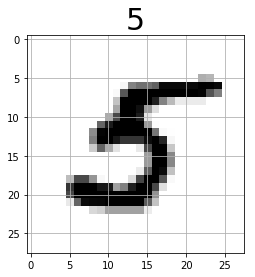

In [3]:
r = np.random.randint(len(df.index))
print(r)
imgshow = plt.imshow(df.iloc[r].values.reshape(28,28), cmap='gray_r')
plt.title(df_label[r], fontsize=30)
plt.grid()
plt.show()

In [4]:
mnb = MultinomialNB()

In [5]:
df_train, df_test, label_train, label_test = train_test_split(df, df_label, test_size=0.33, random_state=42)

In [6]:
mnb.fit(df_train.values, label_train.values)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [7]:
prediction = mnb.predict(df_test.values)

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
accuracy_score(prediction,label_test.values)

0.82510822510822512

In [18]:
df_test2 = pd.read_csv('test.csv', header=0)
df_test2.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
prediction2 = mnb.predict(df_test2.values/255)

In [12]:
df_output = pd.DataFrame({
    'ImageId' : df_test2.index.values+1,
    'label': prediction2
})

In [13]:
df_output.to_csv("/home/zectrosan/Documents/python/data/MNIST/output_lr.csv", sep=',')

In [14]:
df_output

,ImageId,label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,2
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
